In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("D:/Downloads/Titanic.csv")

In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
df.shape

(891, 15)

In [35]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [36]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
df['age'].fillna(df['age'].median(),inplace = True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace = True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace = True)
df.drop(columns = ['deck'],inplace = True )

In [38]:
df['age'] = df['age'].astype(int)

In [39]:
for col in df.columns:
    print(col)
    unique_records= df[col].unique()
    print(unique_records)   

survived
[0 1]
pclass
[3 1 2]
sex
['male' 'female']
age
[22 38 26 35 28 54  2 27 14  4 58 20 39 55 31 34 15  8 19 40 66 42 21 18
  3  7 49 29 65  5 11 45 17 32 16 25  0 30 33 23 24 46 59 71 37 47 70 12
  9 36 51 44  1 61 56 50 62 41 52 63 43 60 10 64 13 48 53 57 80  6 74]
sibsp
[1 0 3 4 2 5 8]
parch
[0 1 2 5 3 4 6]
fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   

In [40]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [41]:
survival_rate_by_gender = df.groupby('who')['survived'].mean()
survival_rate_by_gender

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

In [42]:
survival_rate_by_class = df.groupby('class')['survived'].mean()
survival_rate_by_class

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [43]:
survival_rate_by_gender_class = df.groupby(['class','who'])['survived'].mean()
survival_rate_by_gender_class

class   who  
First   child    0.833333
        man      0.352941
        woman    0.978022
Second  child    1.000000
        man      0.080808
        woman    0.909091
Third   child    0.431034
        man      0.119122
        woman    0.491228
Name: survived, dtype: float64

# Insights:

In [44]:
# Higher survival rate among females. (survival_rate_by_gender)

# First class had the highest survival rate. (survival_rate_by_class)

# Females in first class had the highest chance of survival.  (survival_rate_by_gender_class)

In [45]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


# visualizations:

## Age distribution (histogram)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1st method

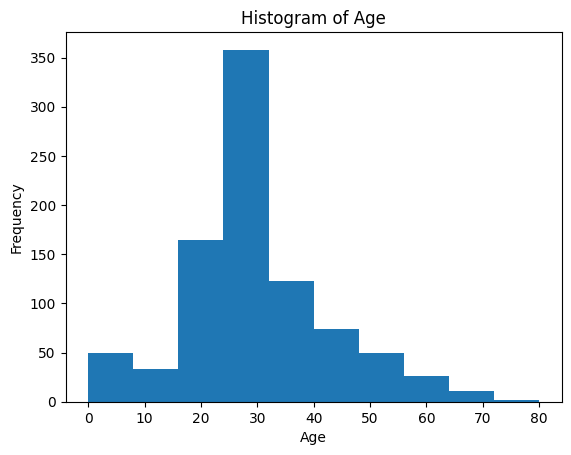

In [47]:
# By Using Matplotlib

plt.hist(df['age'])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2nd method 

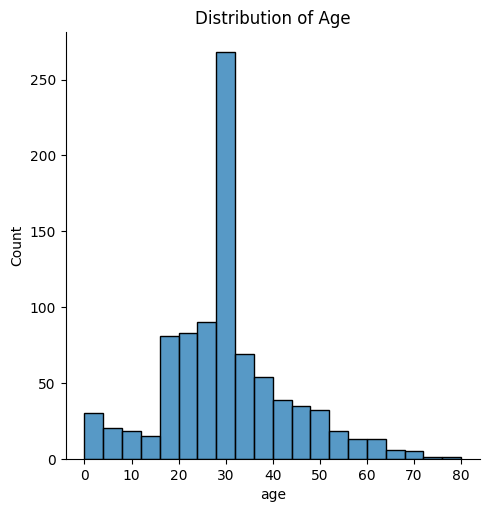

In [48]:
# By using Seaborn

sns.displot(df['age'],bins = 20)
plt.title('Distribution of Age')
plt.show()

### 3rd method

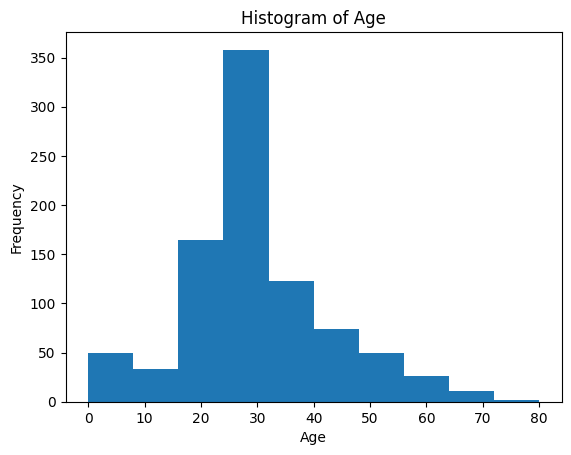

In [49]:
# By using Pandas

df['age'].plot(kind = 'hist')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

In [50]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


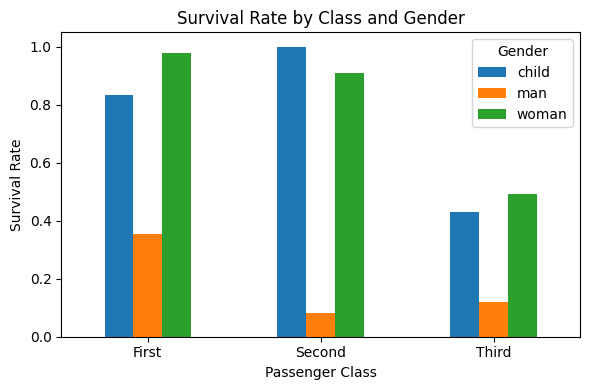

In [51]:
# Barplot By Using Matplotlib

grouped_data = df.groupby(['class', 'who'])['survived'].mean().unstack()

grouped_data.plot(kind='bar', figsize=(6, 4))

plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

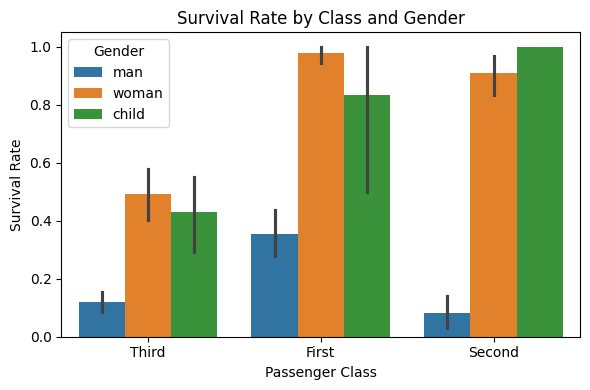

In [52]:
# Barplot By Using Seaborn

plt.figure(figsize=(6, 4))
sns.barplot(x='class', y='survived', hue='who', data=df)

plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

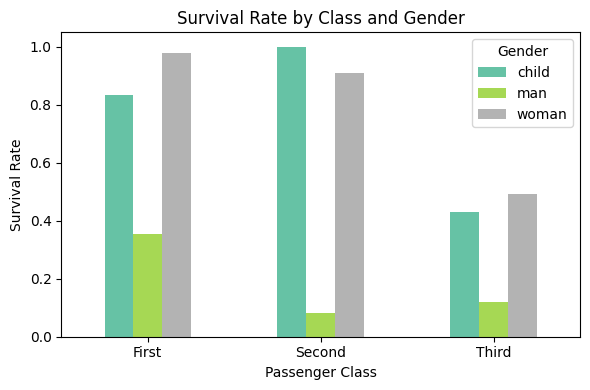

In [53]:
# Barplot By Using Pandas

grouped_data = df.groupby(['class', 'who'])['survived'].mean().unstack()

grouped_data.plot(kind='bar', figsize=(6,4), colormap='Set2')

plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

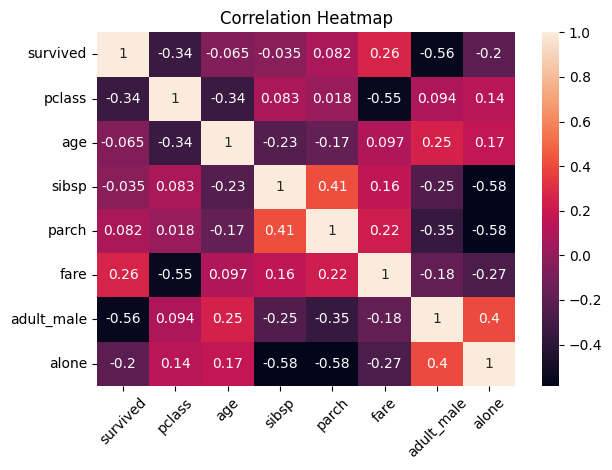

In [54]:
# Heatmap By Using Seaborn

sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

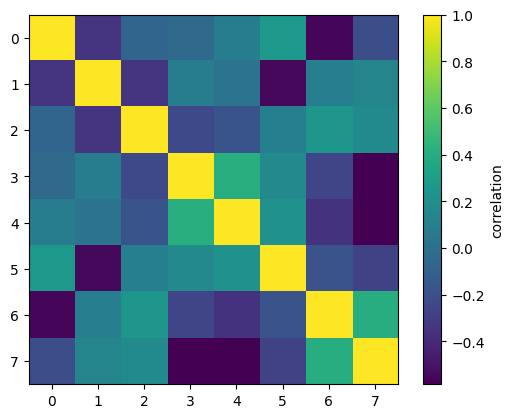

In [55]:
# Heatmap By Using Seaborn

plt.imshow(df.corr(numeric_only = True))
plt.colorbar(label = 'correlation')
plt.show()

In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


# Summary Insights


In [57]:
# Females had a significantly higher survival rate than males across all classes.

# First-class passengers were more likely to survive, likely due to better access to lifeboats and priority.

# The age distribution was right-skewed, with most passengers aged between 20–40.

